# Ecuaciones de Acústica

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
from exact_solvers import acoustics, acoustics_demos
from IPython.display import IFrame

En este cuaderno interactivo exploraremos el problema de Riemann para las ecuaciones de acústica. Estas ecuaciones son uno de los ejemplos más fundamentales de sistemas de leyes de conservación hiperbólicos. Estos sistemas de ecuaciones diferenciales parciales constituyen la base para modelar propagación de ondas en sistemas físicos. Empezaremos con una breve introducción de donde se derivan las ecuaciones de acústica, después exploraremos la estructura de las ecuaciones en términos de caractéristicas y finalmente expondremos la solución al problema de Riemann. Este cuaderno interactivo esta basado en el proyecto "rieman_book" por David Ketcheson, Randall J Leveque y Mauricio del Razo. El proyecto original puede ser consultado en [este repositorio](https://github.com/clawpack/riemann_book). Para más detalles sobre este y otro sistemas de leyes de cosnervación, le sugerimos al lector consultar <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque 2002)</a></cite>.

El código usado para producir las soluciones y figuras de este cuaderno se pueden consultar aqui:
 - [exact_solvers/acustica.py](exact_solvers/acustica.py)
 - [exact_solvers/acustica_demos.py](exact_solvers/acustica_demos.py)

## Derivación de las ecuaciones de acústica
Las ecuaciones de acústica lineales describen la propagación de pequeñas perturbaciones en un fluido, como las ondas de sonido. Tomamos de punto de partida la ecuación de continuidad unidimensional, que describe la conservación de masa:
\begin{align} \label{Ac:continuity}
    \rho_t + (\rho u)_x & = 0.
\end{align}  
Para obtener modelos de fluidos realistas, necesitamos otra ecuación que determine la velocidad $u$. Esto generalmente toma la forma de una ley de conservación para el momento $\rho u$. El momento, al igual que la densidad, se transporta en el fluido con el flujo correspondiente $\rho u$. Además, cualquier diferencia en la presión también conducirá a un flujo de momento que es proporcional a la diferencia de presión. Por lo tanto, la ecuación de momento toma la forma
\begin{align} \label{Ac:mom_cons}
(\rho u)_t + (\rho u^2 + P(\rho))_x & = 0,
\end{align}  
donde asumimos que el sistema obedece la ecuación de estado $ P (\ rho) $, y la presión $ P $ es solo función de la densidad. Ecuaciones de estado más generales, que pueden incluso depender de la energía, proveen modelos aun más realistas, como las ecuaciones no lineales de Euler. 

Las ecuaciones acústicas lineales emergen cuando uno se concentra en el comportamiento de pequeñas perturbaciones en el sistema compuesto por las ecuaciones \eqref{Ac:continuity} y \eqref{Ac:mom_cons}. Estas dos ecuaciones juntas forman un sistema de leyes de conservación de la forma $q_t+f(q)_x=0$, con  
\begin{align*}
q & = \begin{bmatrix} \rho \\ \rho u \end{bmatrix} & 
f(q) & = \begin{bmatrix} \rho u \\ \rho u^2 + P(\rho) \end{bmatrix}
\end{align*}  

Para derivar las ecuciones de acústica lineales, necesitamos usar la forma cuasilineal de un sistema hiperbólico,
$$q_t + f'(q) q_x = 0,$$  
donde $f'(q)$ es el Jacobiano del flujo $f$ con respecto a las variables conservadas $q$. En general, resulta más natural escribir $f$ en términos de las llamadas variables primitivas (en este caso $\rho$ y $u$) en lugar de utilizar las variables conservadas $q$ . Para encontrar el Jacobiano del flujo (y por lo tanto la forma cuasilineal), primero escribimos $f$ en términos de las variables conservadas $(q_1, q_2) = (\rho, \rho u)$:
\begin{align}
f(q) & = \begin{bmatrix} q_2 \\ q_2^2/q_1 + P(q_1) \end{bmatrix}.
\end{align}  

El Jacobiano del flujo es simplemente
\begin{align*}
f'(q) & = \begin{bmatrix} \partial f_1/\partial q_1 & \partial f_1/\partial q_2 \\
                          \partial f_2/\partial q_1 & \partial f_2/\partial q_2 \end{bmatrix} \\
      & = \begin{bmatrix} 0 & 1 \\ -q_2^2/q_1^2 + P'(q_1) & 2q_2/q_1 \end{bmatrix} \\
      & = \begin{bmatrix} 0 & 1 \\ P'(\rho)-u^2 & 2u \end{bmatrix}.
\end{align*}

Consecuentemente, las pequeñas perturbaciones al estado base $\rho_0, u_0$ evolucionan según las ecuaciones linealizadas $ q_t + f '(q_0) q_x = 0 $, o más explícitamente
\begin{align*}
\rho_t + (\rho u)_x & = 0 \\
(\rho u)_t + (P'(\rho_0)-u_0^2)\rho_x + 2u_0(\rho u)_x & = 0.
\end{align*}  
Como solo nos interesan pequeñas perturbaciones a la ecuación \eqref {Ac: mom_cons}, hacemos una expansión de las perturbaciones $\rho- \rho_0$ y $\rho u - \rho_0 u_0$ en terminos de un parámetro pequeño $\epsilon$, y desechamos los términos de orden $\epsilon ^ 2 $ o mayor. Esto da como resultado el sistema hiperbólico lineal
\begin{align*}
p_t + u_0 p_x + P'(\rho_0) u_x & = 0 \\
u_t + \frac{1}{\rho_0} p_x + u_0 u_x & = 0,
\end{align*}
donde $p(x, t)$ es la presión en función de $x$ y $t$. Si el fluido está en reposo (es decir, $u_0 = 0$) y la presión es directamente proporcional a la densidad, las ecuaciones se simplifican a
\begin{align} \label{Ac:main}
 \left[ \begin{array}{c}
p \\
u 
\end{array} \right]_t
+  \underbrace{\left[ \begin{array}{cc}
0 & K_0 \\
1/\rho_0 & 0  \\
\end{array} \right]}_{\mathbf{A}}
\left[ \begin{array}{c}
p \\
u \end{array} \right]_x = 0,
\end{align}
a la variable $K_0=\rho_0 P'(\rho_0)$ se le conoce como el módulo de compresibilidad. Las ecuaciones \eqref{Ac:main} son llamadas ecuaciones de acústica lineales.

En el resto de este cuaderno trabajaremos con el sistema de ecuaciones \eqref{Ac:main} y llamamos $q = [p, u]^T$. Por loq eu escribimos el sistema \eqref{Ac:main} como $ q_t + A q_x = 0 $. Para simplificar, también eliminamos los subíndices en $K$ y $\rho$. 

Para estudiar este sistema, resultará útil calcular los vectores propios de $A$, dados por
\begin{align}
\lambda_1 = -c, \qquad \lambda_2 = c
\end{align}

donde $c=\sqrt{{K}/{\rho}}$ a la velocidad del sonido en un medio con cierta densidad y cierto modulo de compresibilidad. Los vectores propios correspondientes, están dados por
\begin{align*}
r_1 = \begin{bmatrix}\begin{array}{c}-Z\\1\end{array}\end{bmatrix}, \qquad r_2 = \begin{bmatrix}\begin{array}{c}Z\\1\end{array}\end{bmatrix},
\end{align*}

donde a $Z=\rho c$ se le denomina la impedancia acústica. Definamos $R = [r_1 r_2]$ y $\Lambda = diag(\lambda_1, \lambda_2)$, entonces $AR = R\Lambda$, o $A = R \Lambda R^{-1}$.  Sustituyendo esto en el sistema \eqref{Ac:main} obtenemos
\begin{align*}
q_t + A q_x & = 0 \\
q_t + R \Lambda R^{-1} q_x & = 0 \\
R^{-1}q_t + \Lambda R^{-1} q_x & = 0 \\
w_t + \Lambda w_x & = 0,
\end{align*}
donde hemos introducido las *variables características* $w = R^{- 1}q$. El último sistema anterior es simplemente un par de ecuaciones de advección desacopladas para $w_1$ y $w_2$, con velocidades $\lambda_1$ y $\lambda_2$; un sistema que es muy sencillo resolver. Por lo tanto, vemos que los valores propios de $A$ son las velocidades a las que la información o ondas se propagan en la solución.

## Soluciones usando características

El análisis anterior sugiere la siguiente estrategia para resolver el problema de Cauchy:

1. Descomponer los datos iniciales $q(x,0)=(p(x,0), u(x,0))$ en las variable características $ w(x,0)=(w_1^0(x),w_2^0(x))$ usando la transfomración $w = R^{-1}q$.
2. Propagar las variables características de acuerdo a: $w_p(x,t) = w_p^0(x-\lambda_p t)$.
3. Transformar de regreso a las variables originales: $q = Rw$.

El primer paso corresponde a expandir el vector $q$ usando $r_1$ y $r_2$ como base. Esto se puede expresar como $q=Rw$ y su solución se obtiene invirtiendo la matriz $R$,
\begin{align*}
q = w_1 r_1 + w_2 r_2,
\end{align*} 
con
\begin{align*}
w_1 = \frac{- p + Z u}{2Z}, \ \ \ \ \ \
w_2 = \frac{ p + Z u}{2Z}.
\end{align*}
En este caso cada una de las componentes de $w$, $w_1$ y $w_2$, obedece una ecuación de advección unidimensional.

En las siguiente figura visualizamos esta descomposición. La primera gráfica muestra los dos vectores propios del sistema, y la segunda muestra como las variables características pueden ser expresadas como combinaciones lineales de los dos vectores propios, $r_1$ and $r_2$. Los parametros se pueden modificar de manera interactiva para observar como los vectores y la decomposición cambian.

In [3]:
acoustics_demos.decompose_q_interactive()

interactive(children=(FloatSlider(value=1.0, description='p', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

Output()

En el segundo y tercer paso, propagamos la solución en las variables características $w$ y después transformamos de regreso a las variable originales. Como ejemplo, supongamos que la condición inicial es velocidad cero y un pequeño pulso en la presión. La siguiente figure muestra la propagación de la condición inicial en las variables características y en una de las variables originales (velocidad).

In [4]:
acoustics_demos.char_solution_interactive()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.2), FloatSlider(value=1.0, description='K'…

Output()

En la primer gráfica, note que las dos variables características $w$ se propagan independientemente ya que cada una de las variables características simplemente obedece a una ecuación de advección desacoplada. Sin embargo, en las variables originales (en este caso, la velocidad) el comportamiento es más complejo que una simple advección.

## El problema de Riemann
Ahora que sabemos cómo resolver el problema del Cauchy, la solución del problema de Riemann es un caso especial.  La condición inicial para el problem de Riemann es simplemente una función constante a trozos con solo una discontinuidad:
\begin{align*}
q(x,0) = \begin{cases}
q_\ell & \text{if   } x \le 0, \\
q_r & \text{if   } x > 0.
\end{cases}
\end{align*}  
Ahora procedemos igual que antes, primero descomponemos en las variables característicos, propagamos la condición inicial con las ecuaciones de advección desacopladas y finalmente transformamos la solución de regreso a las variable originales.  Sin embargo, como sabemos que la solución será constante en casi todas partes, es aún más sencillo descomponer el salto $\Delta q = q_r - q_\ell$ en términos de las variables características, y propagar los dos saltos resultantes $\Delta w_1$ y $\Delta w_2$:  
\begin{align*}
\Delta w = \alpha_1 r_1 + \alpha_2 r_2,
\end{align*}  
Como $R\Delta w = \Delta q$, obtenemos  
\begin{align*}
\alpha_1 = \frac{-\Delta p + Z\Delta u}{2Z}, \ \ \ \ \ \
\alpha_2 = \frac{\Delta p + Z\Delta u}{2Z}.
\end{align*}  

Por lo tanto, la solución tiene la estructura que se muestra a continuación.

![Fig 4.1: Structure of the Riemann solution for acoustics.](./figures/acoustics_xt_plane.png)

Las dos rectas en el plano $x-t$ representan las lineas características en donde se propagan los dos saltos $\Delta w_1$ y $\Delta w_2$ con velocidad $-c$ y $c$, respectivamente. Estas rectas dividen la solución en tres regiones, cada una con un valor constante. Ya que $q_\ell$ y $q_r$ corresponde a la condición inicial, solo necesitamos $q_m$. Usando los saltos correspondientes es facil obtener el valor de $q_m$:   
\begin{align}
q_m = q_\ell + \alpha_1 r_1 = q_r - \alpha_2 r_2.
\label{eq:acussol}
\end{align}  
Debido a la estructura de los vectores propios, note que independientemente de los valores de $q_\ell$ y $q_r$, el salto en $p$ es $\pm Z$ veces el salto en $u$. De hecho, los vectores propios de la matriz de coeficientes de cualquier sistema hiperbólico lineal muestran la relación entre los saltos en las diferentes componentes de $q$. Por ejemplo, el vector propio, cuyo valor propio corresponde a cierta línea característica, indica en que proporciones cambia cada componente de $q$ al cruzar esta línea característica. En el caso de las ecuaciones de Acústica, la impedancia $Z$ la que determina esta relación.

### Una solución sencilla

Aqui empezamos con una condición inicial sencilla y resolvemos el problem de Riemann. La solución es expresada como el valor de $q$ en las tres regiones, $q_l$, $q_m$ y $q_r$; y las velocidades de las dos ondas.

In [5]:
# Datos iniciales para el problema de Riemann
rho = 0.5               # densidad
bulk = 2.               # modulo de compresibilidad 
ql = np.array([3,2])   # Condición inicial del lado izquierdo
qr = np.array([3,-2])  # Condición inicial del lado derecho
# Parametros calculados
c = np.sqrt(bulk/rho)  # velocidad del sonido
Z = np.sqrt(bulk*rho)  # impedancia acústica
print("Densidad   rho = %g,  Módulo de compresibilidad K = %g" % (rho,bulk))
print("Velocidad del sonido c = %g,  Impedancia    Z = %g \n" % (c,Z))

Densidad   rho = 0.5,  Módulo de compresibilidad K = 2
Velocidad del sonido c = 2,  Impedancia    Z = 1 



In [6]:
# Solución del problema de Riemann
estados, velocidades, reval = acoustics.exact_riemann_solution(ql ,qr, [rho, bulk])
print("Los tres estados ql, qm y qr son: ")
print(estados, "\n")
print("Las velocidades de las dos ondas son:")
print(velocidades)

Los tres estados ql, qm y qr son: 
[[ 3.  5.  3.]
 [ 2.  0. -2.]] 

Las velocidades de las dos ondas son:
[-2.  2.]


Como ya mostramos en la sección anterior, una manera de entender la solución a un sistema lineal como las ecuaciones acústicas es mirando el plano de fase. Podemos mostrar la estructura de esta solución en el plano de fase $p-u$. Mostramos las dos condiciones iniciales del problema de Riemann $q_l$ y $q_r$ como puntos en el plano fase; las líneas que cruzan estos puntos corresponden a rectas generadas en la dirección de los vectores propios, $r_1$ y $r_2$. 

La solución del estado medio $q_m$ es simplemente la intersección de la línea generada por $r_1$ pasando por $q_l$ y la línea generada por $r_2$ pasando por $q_r$. La estructura de esta solución se hace evidente a partir de la ecuación (\ref{eq:acussol}). Note que hay otra intersección entre estas líneas (punteadas), estas corresponden a conectar $q_l$ a $q_m$ con el vector propio $r_2$, lo cual no es la solución correcta (ver ecuación (\ref{eq:acussol})).

En la siguiente figura es posible ajustar interactivamente la condición inicial, los parámetros así como el rango de trazado, para que el usuario pueda explorar cómo la estructura de la solución en el plano fase se ve afectada por estas cantidades.

In [7]:
acoustics_demos.interactive_phase_plane(ql,qr,rho,bulk)

interactive(children=(FloatSlider(value=3.0, description='$p_l$', max=10.0, min=0.01), FloatSlider(value=2.0, …

Output()

Tenga en cuenta que los vectores propios son función de la impedancia $Z$, la cual depende de la densidad $\rho$
y el módulo de compresibilidad $K$. Por lo tanto, cuando $\rho$ y $K$ son modificados los vectores propios cambian y consecuentemente la pendiente de las líneas también cambia.

## Ejemplos
Usaremos la solución del problema de Riemann exacta en [exact_solvers/acústica.py](exact_solvers/acústica.py) y las funciones en[exact_solvers/acústica_demos.py](exact_solvers/acústica_demos.py) (exact_solvers/acústica_demos.py) para trazar soluciones interactivas de varios ejemplos interesantes.
### Tubo de choque

Si hay un salto en la presión, y una velocidad es $0$ en ambos estados iniciales (el problema del tubo de choque) entonces la solución al problema de Riemann consiste en saltos de presión de igual magnitud propagándose en ambas direcciones, con saltos de velocidad iguales en magnitud, pero en dirección opuesta. Esto se llama el problema del tubo de choque ya que emula lo que sucedería dentro de un tubo de choque, donde el aire se encuentra estático y una cámara separada en un extremo del tubo es presurizada a alta presión para luego ser abierta. En el momento que la camara es abierta, se genera una onda de alta presión que se propaga hacia la región de baja presión y otra onda de baja presión que se propaga de vuelta a la cámara. Más adelante veremos que si utilizamos modelos más complejos, como las ecuaciones de Euler, estas ondas corresponderán a un choque y a una rarefacción, respectivamente. En la siguiente figura interactiva podemos observar como se evoluciona la solución al problema de Riemann en el tiempo, y también los tres estados $q_l$, $q_m$ y $q_r$ en el estado fase. 

In [8]:
ql = np.array([5,0])
qr = np.array([1,0])
rho = 1.0
bulk = 4.0
acoustics_demos.riemann_plot_pplane(ql,qr,rho,bulk)

interactive(children=(FloatSlider(value=0.0, description='$t$', max=1.0), IntSlider(value=5, description='pl',…

Output()

###  Reflexión en una pared

Como otro ejemplo, supongamos que la presión es inicialmente la misma en los estados izquierdo y derecho, mientras que las velocidades son distintas de cero con $u_r = -u_\ell > 0$.  Las partículas convergen de ambos lados y si los estados iniciales tienen esta simetría, entonces el resultado es un estado medio $q_m$ en el que la velocidad es 0 (y la presión es mayor que en ambos lados).

In [9]:
ql = np.array([2,1])  
qr = np.array([2,-1])  
rho = 1.0
bulk = 1.5
acoustics_demos.riemann_plot_pplane(ql,qr,rho,bulk)

interactive(children=(FloatSlider(value=0.0, description='$t$', max=1.0), IntSlider(value=2, description='pl',…

Output()

En esta figura interactiva volvemos a mostrar la solución al problema de Riemann. Nótese que la simetría de esta solución también se puede observar en la estructura de la solución en plano fase.

Si se descarta la mitad de la solución, digamos $x>0$ (o igualmente $x<0$), podemos entender esto como la solución a un problema de flujo de fluido con velocidad constante que se impacta contra una pared sólida. El resultado es una onda acústica que se aleja de la pared, mientras que el fluido detrás del choque se desacelera a velocidad 0, es decir, está estático dado el impacto contra la pared.

Este tipo de solución de Riemann es crítica cuando se imponen condiciones de frontera de muros sólidos en un método numérico. Si las células fantasma se introducen fuera del dominio y el estado en el conjunto de células fantasma reflejando la solución interior con la simetría que se ve aquí (igual presión, velocidad negada), entonces la solución al problema de Riemann en las interfaces de las células produce una solución que satisface las condiciones de frontera deseadas. 

Tenga en cuenta que es posible ampliar la solución del problema de Riemann para las ecuaciones de acústica a casos donde hay diferentes materiales a la izquierda y a la derecha. Esto es útil para resolver la propagación de ondas acústicas a través de interfaces o medios heterogéneos.

### Gráfica interactiva completa con plano fase
Para una exploración más general de la solución a la ecuación acústica, ahora mostramos una solución interactiva completa de las ecuaciones acústicas, incluyendo el plano de fase. Por favor, espere un poco de tiempo para que el gráfico se actualice mientras ajusta los controles interactivos.

In [10]:
acoustics_demos.full_riemann_interactive()

interactive(children=(FloatSlider(value=0.0, description='$t$', max=1.0), FloatSlider(value=10.0, description=…

Output()

### Pulso como condición inicial
En este ejemplo, utilizamos el ejemplo del pulso original descrito al principio de este capítulo. La condición inicial es simplemente un pulso en la presión, mientras que la velocidad es igual a cero. Además, fijamos las paredes en $x=-2$ y $x=2$, de modo que la onda se refleja completamente en ambas fronteras, y podemos ver cómo interactúa consigo misma. 


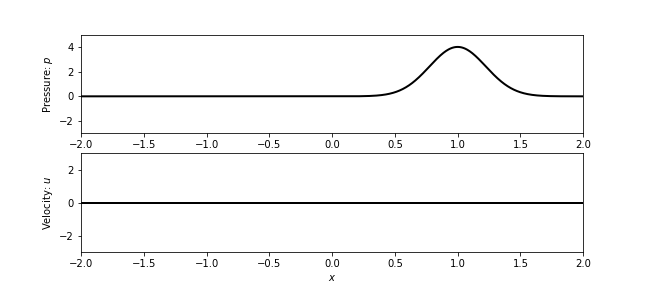
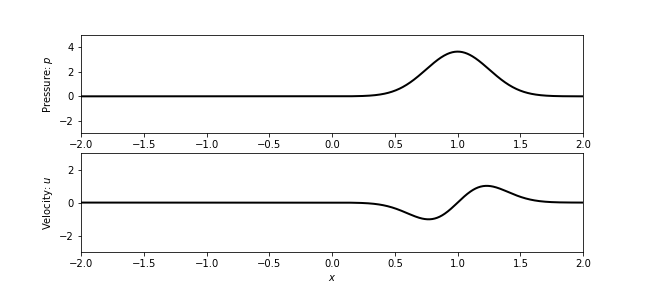
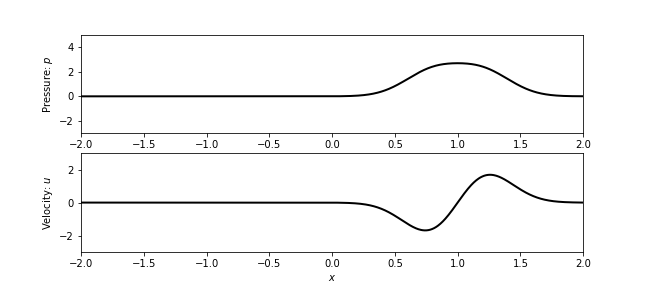
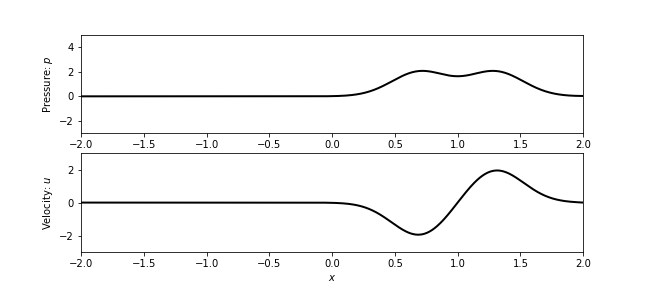
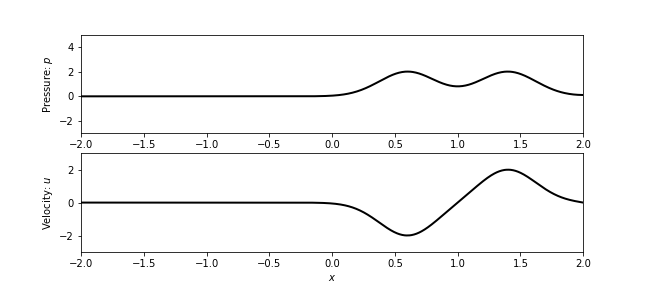
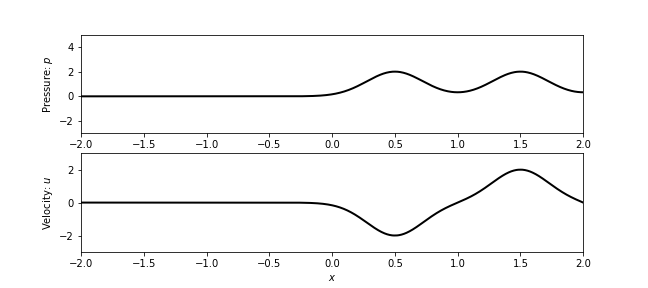
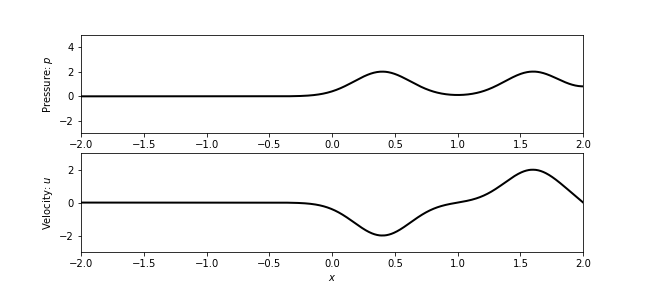
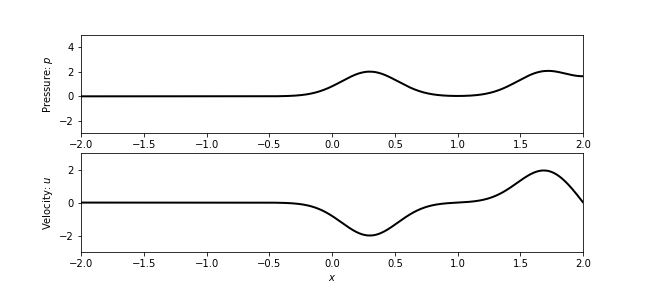
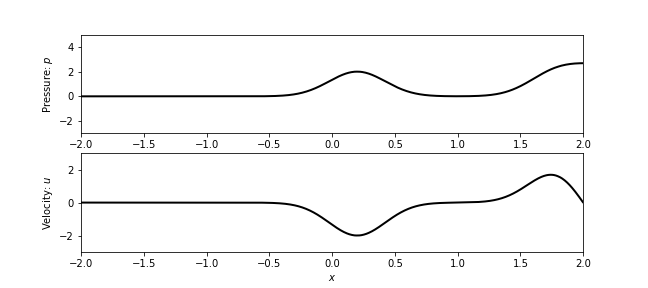
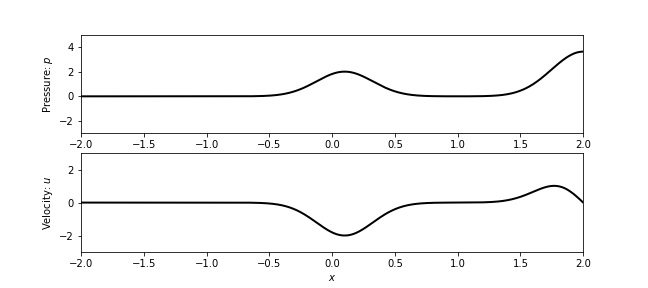
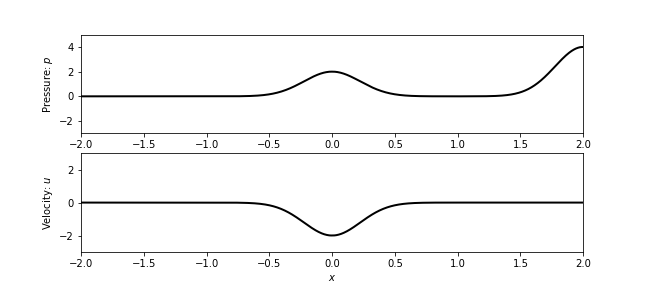
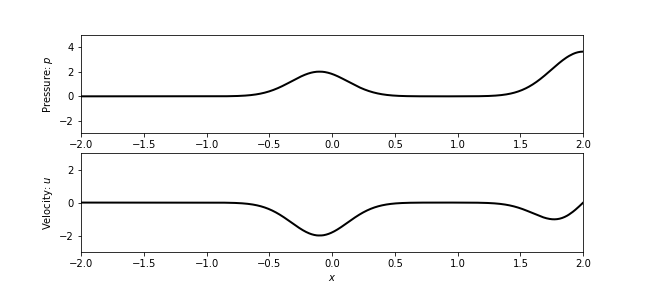
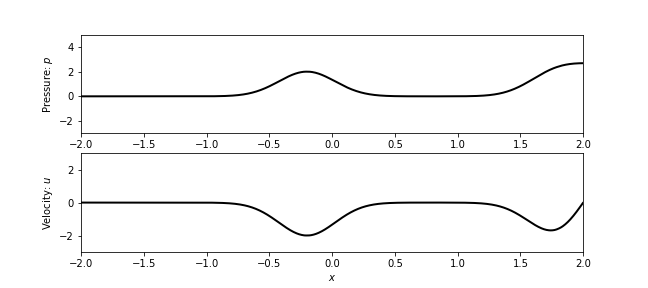
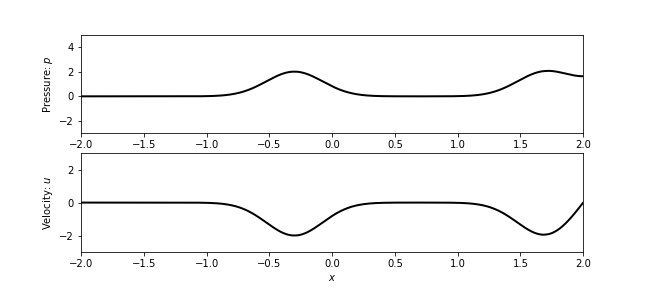
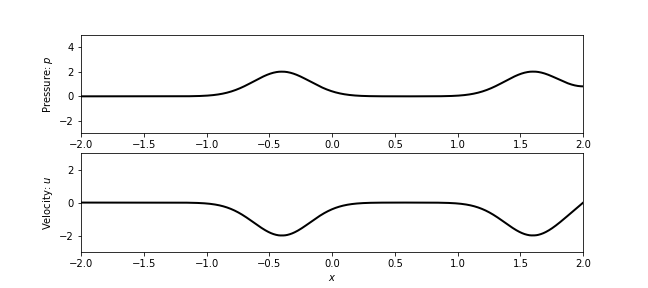
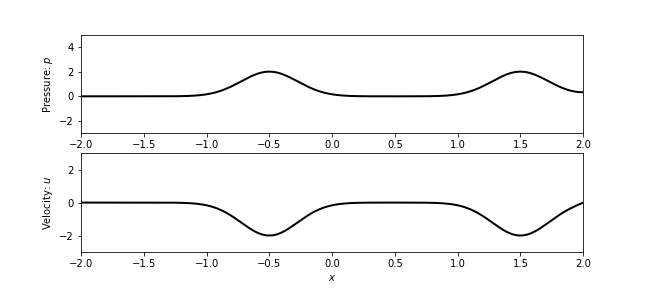
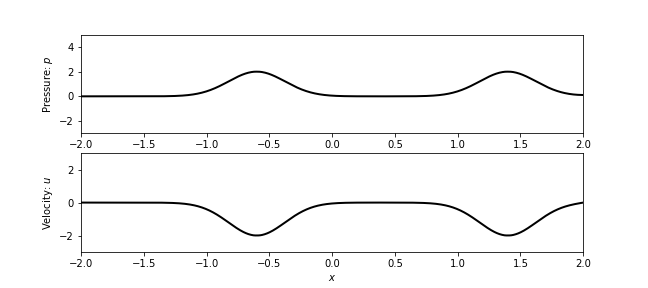
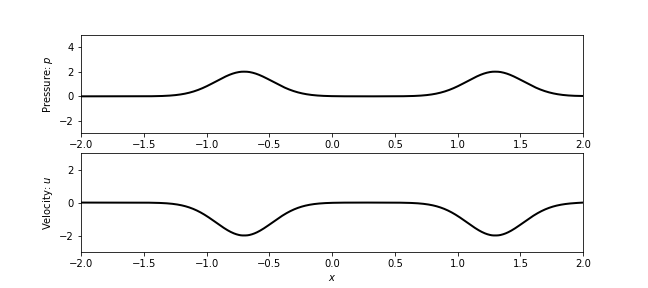
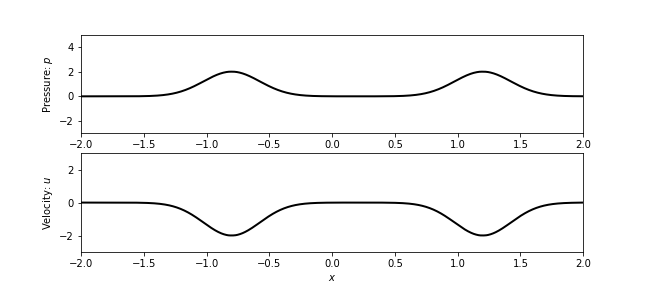
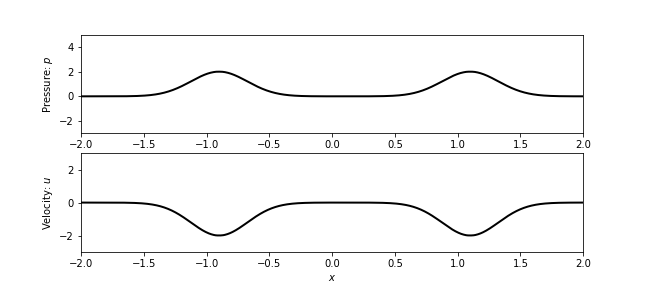
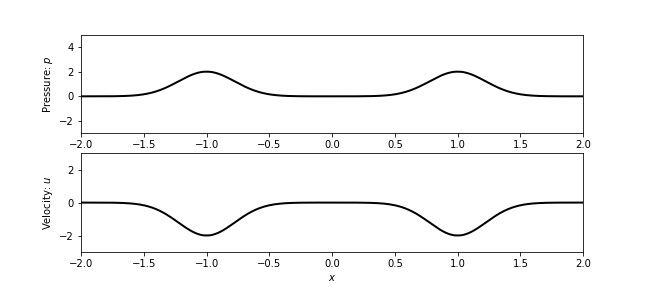
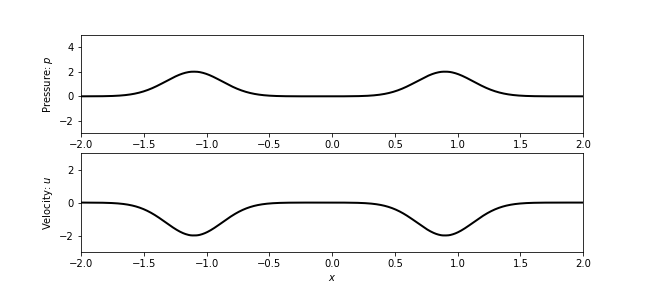
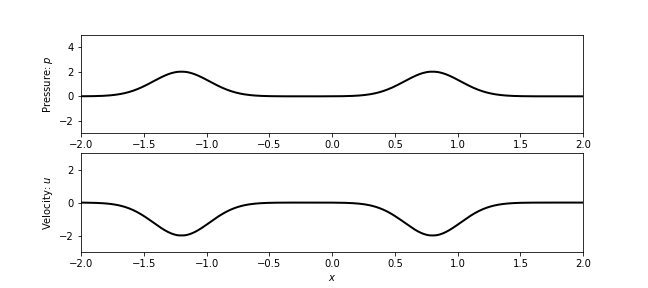
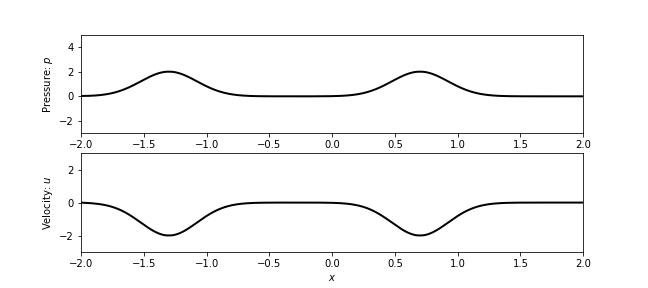
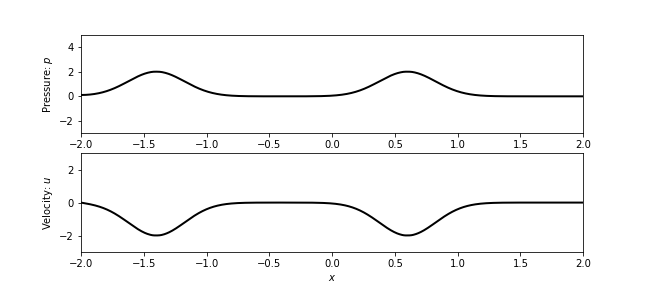
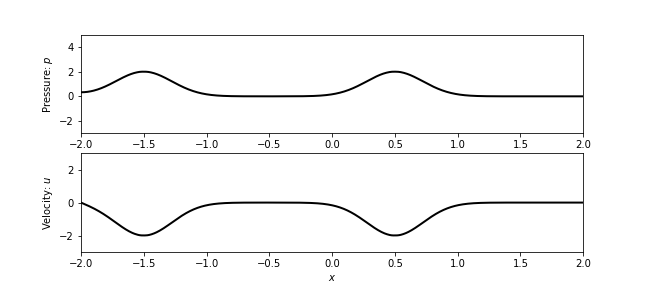
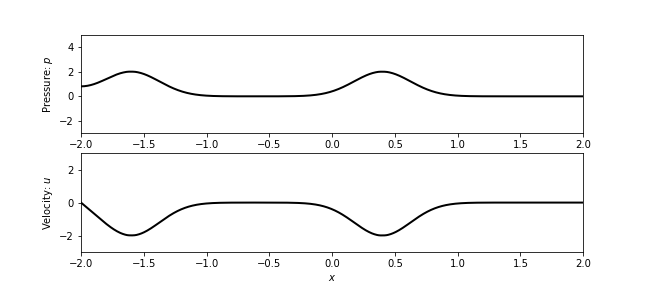
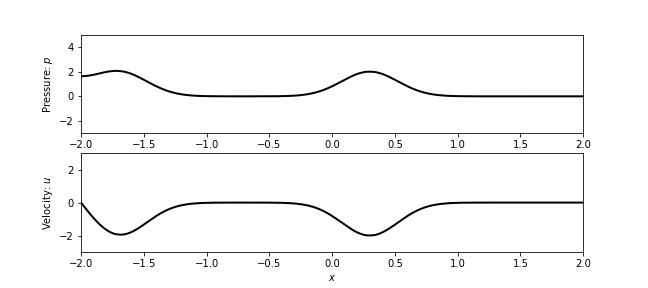
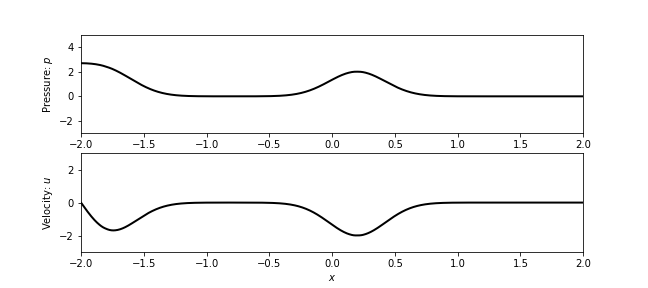
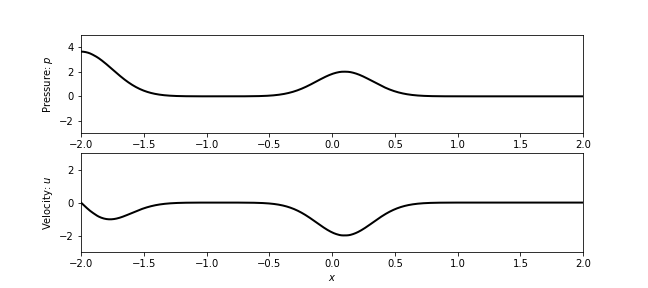
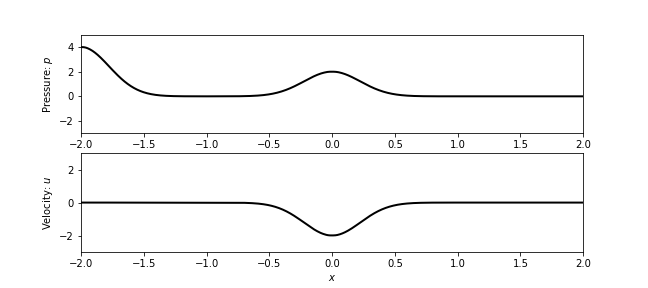
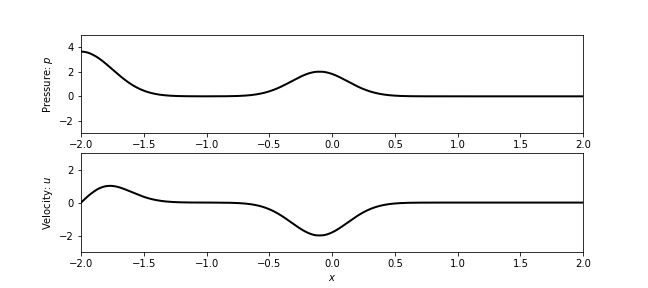
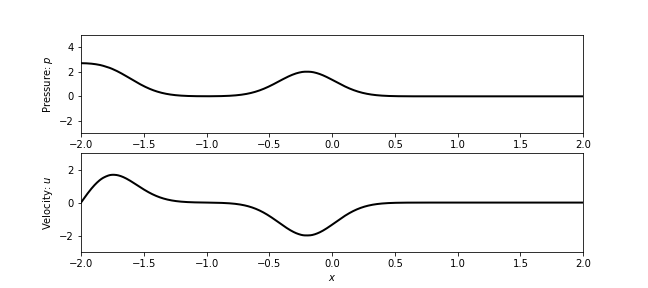
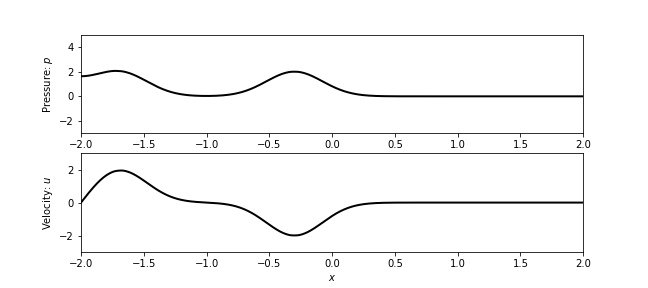
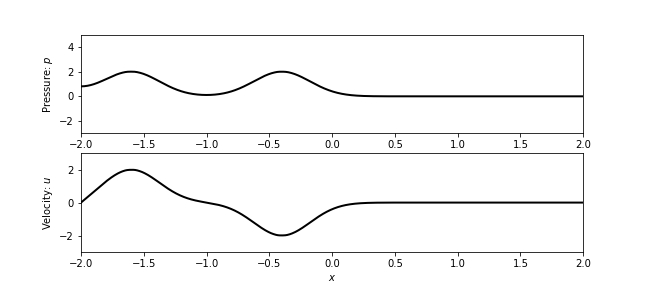
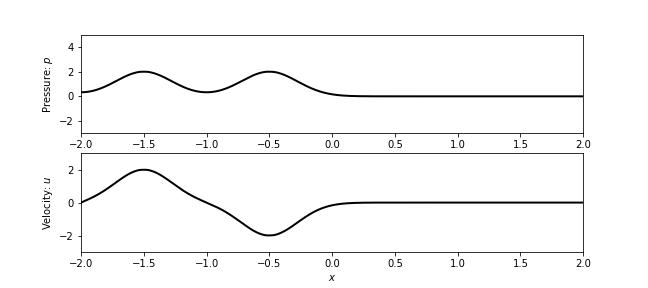
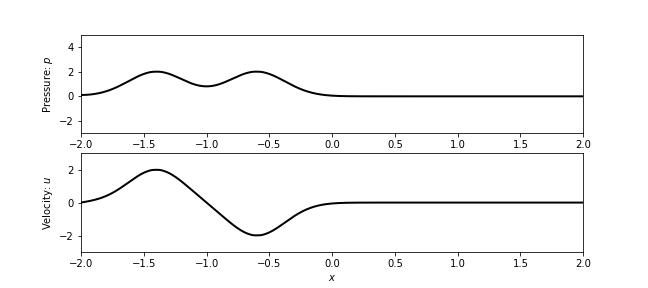
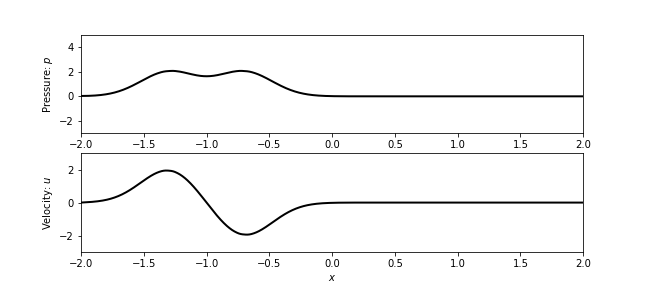
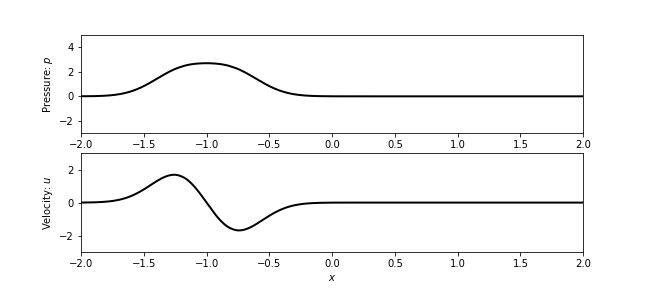
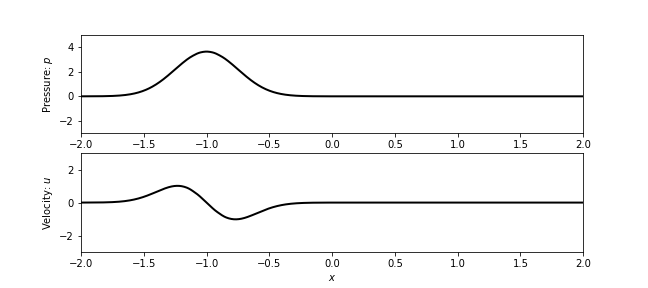
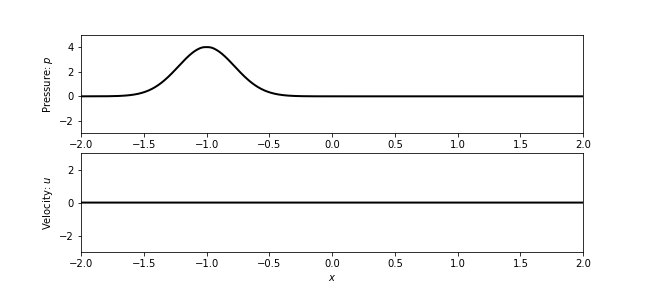
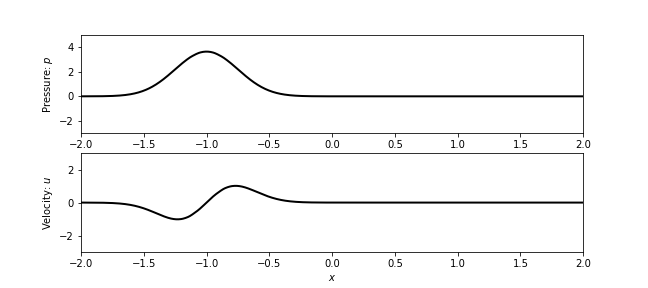
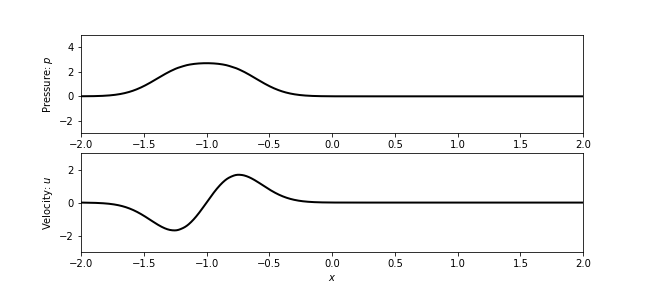
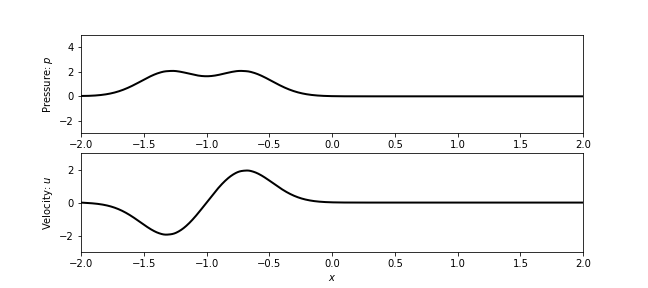
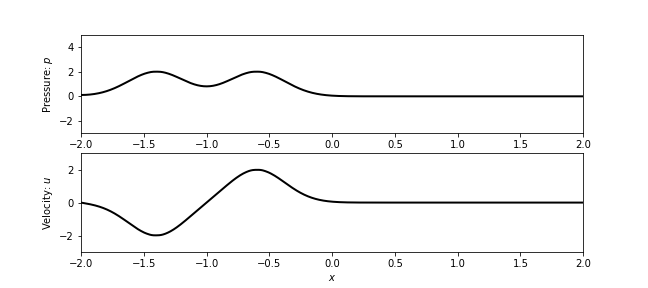
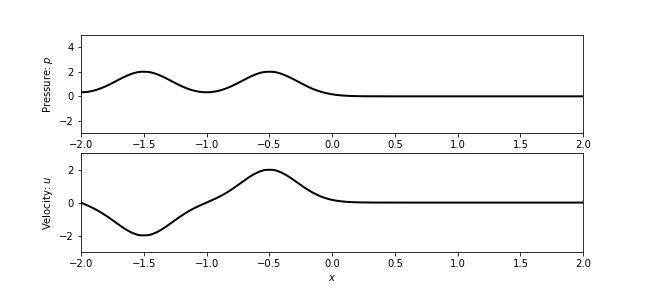
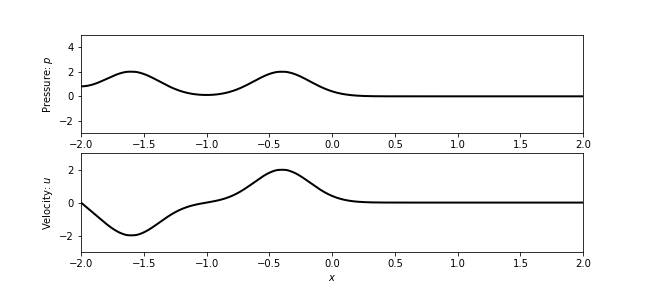
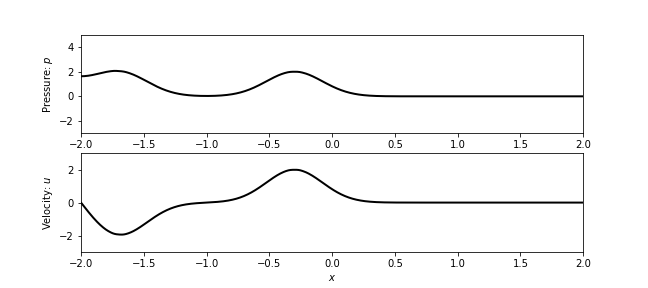
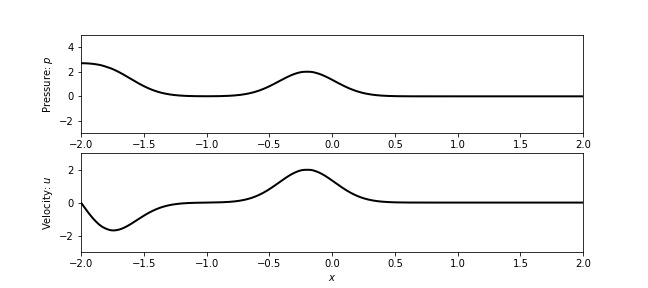
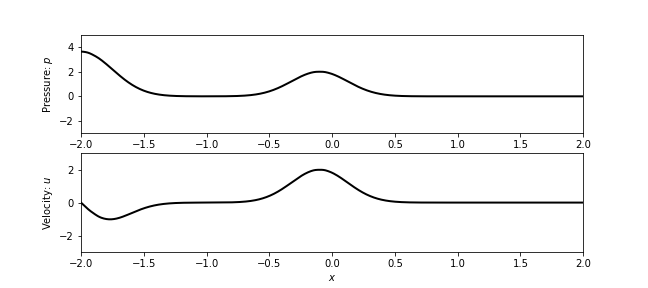
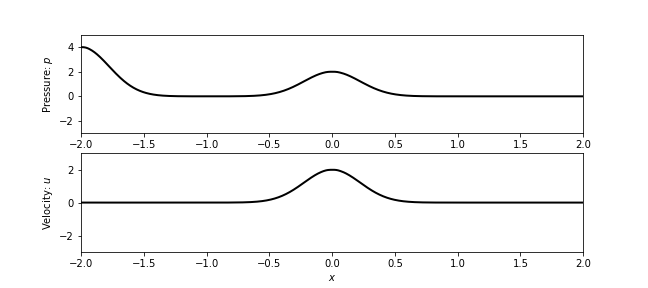

In [11]:
acoustics_demos.bump_animation(numframes = 50)